# ABOUT THE DATASET(SALES DATA)


In [5]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [7]:
#READING CSV FILE
data=pd.read_csv('sales_data.csv', header= 0,
                        encoding= 'unicode_escape')

In [9]:
#TO DISPLAY ALL THE COLUMNS
pd.set_option('display.max_columns', None)

In [11]:
#DISPLAYING DATA FOR FIRST 5 ROWS
data.head()

,ORDERNUMBER,QUANTITY,PRICE,ORDERLINENUMBER,SALES,DATE,STATUS,QTR,MONTH,YEAR,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,LAST_NAME,FIRST_NAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [13]:
#DISPLAYING NAME OF ALL THE COLUMNS IN THE DATASET
data.columns

Index(['ORDERNUMBER', 'QUANTITY', 'PRICE', 'ORDERLINENUMBER', 'SALES', 'DATE',
       'STATUS', 'QTR', 'MONTH', 'YEAR', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE',
       'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY',
       'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'LAST_NAME',
       'FIRST_NAME', 'DEALSIZE'],
      dtype='object')

In [15]:
#RENAMING COLUMNS
data.rename(columns={'QUANTITYORDERED':'QUANTITY','PRICEEACH':'PRICE','ORDERDATE':'DATE','QTR_ID':'QTR','MONTH_ID':'MONTH','YEAR_ID':'YEAR','CONTACTLASTNAME':'LAST_NAME','CONTACTFIRSTNAME':'FIRST_NAME'},inplace=True)

In [17]:
#DISPLAYING DATA WITH NEW COLUMN NAME
data.head()

,ORDERNUMBER,QUANTITY,PRICE,ORDERLINENUMBER,SALES,DATE,STATUS,QTR,MONTH,YEAR,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,LAST_NAME,FIRST_NAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [19]:
#GENERATING DIMENSIONS OF DATASET
data.shape

(2823, 25)

In [21]:
#DISPLAYING THE ROWS AND COLUMNS OF DATASET
print('There are {0} rows and {1} columns in data'.format(data.shape[0],data.shape[1]))

There are 2823 rows and 25 columns in data


In [23]:
#DISPLAYING THE DATATYPES OF ALL THE COLUMNS
data.dtypes

ORDERNUMBER                 int64
QUANTITY                    int64
PRICE                     float64
ORDERLINENUMBER             int64
SALES                     float64
DATE               datetime64[ns]
STATUS                     object
QTR                         int64
MONTH                       int64
YEAR                        int64
PRODUCTLINE                object
MSRP                        int64
PRODUCTCODE                object
CUSTOMERNAME               object
PHONE                      object
ADDRESSLINE1               object
ADDRESSLINE2               object
CITY                       object
STATE                      object
POSTALCODE                 object
COUNTRY                    object
TERRITORY                  object
LAST_NAME                  object
FIRST_NAME                 object
DEALSIZE                   object
dtype: object

In [25]:
#CONVERTING THE DATA TYPE OF DATE FROM OBJECT TO DATETIME
data['DATE']=pd.to_datetime(data['DATE'])

In [27]:
#DISPLAYING THE CORRECT DATA TYPES OF ALL THE COLUMNS AFTER MODIFICATION
data.dtypes

ORDERNUMBER                 int64
QUANTITY                    int64
PRICE                     float64
ORDERLINENUMBER             int64
SALES                     float64
DATE               datetime64[ns]
STATUS                     object
QTR                         int64
MONTH                       int64
YEAR                        int64
PRODUCTLINE                object
MSRP                        int64
PRODUCTCODE                object
CUSTOMERNAME               object
PHONE                      object
ADDRESSLINE1               object
ADDRESSLINE2               object
CITY                       object
STATE                      object
POSTALCODE                 object
COUNTRY                    object
TERRITORY                  object
LAST_NAME                  object
FIRST_NAME                 object
DEALSIZE                   object
dtype: object

In [29]:
#CHECKING NUMBER OF DUPLICATE ROWS IN DATASET
data.duplicated().sum()

0

In [31]:
#PRINTITNG NUMBER OF DUPLICATE ROWS IN DATASET
print('There are {0} duplicates in data'.format(data.duplicated().sum()))

There are 0 duplicates in data


In [33]:
#CHECKING NULL VALUES PRESENT IN THE COLUMNS
data.isnull().sum()

ORDERNUMBER        0
QUANTITY           0
PRICE              0
ORDERLINENUMBER    0
SALES              0
DATE               0
STATUS             0
QTR                0
MONTH              0
YEAR               0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
CUSTOMERNAME       0
CITY               0
COUNTRY            0
LAST_NAME          0
FIRST_NAME         0
DEALSIZE           0
dtype: int64

<AxesSubplot:>

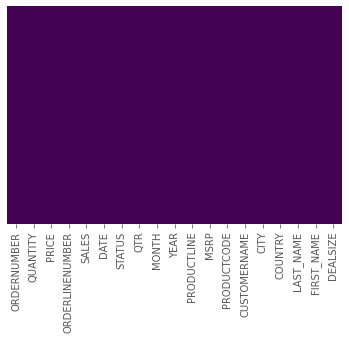

In [35]:
#VISUALING NULL VALUES OF THE COLUMNS USING HEATMAP
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [37]:
#DROPPING UNNECESSARY COLUMNS AND COLUMNS CONTAINING NULL VALUES
data=data.drop(['PHONE','STATE','TERRITORY','POSTALCODE','ADDRESSLINE1','ADDRESSLINE2'],axis=1)

KeyError: "['PHONE', 'STATE', 'TERRITORY', 'POSTALCODE', 'ADDRESSLINE1', 'ADDRESSLINE2'] not found in axis"

In [ ]:
#RECHECKING THE NULL VALUES PRESENT IN THE COLUMNS
data.isnull().sum()

In [ ]:
#PRINTING THE NUMBER OF NULL VALUES IN THE DATASET
print('There are 0 null values in data')

In [ ]:
#VISUALISING THE NULL VALUES USING HEATMAP AFTER DROPPING FEW COLUMNS
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#DISPLAYING THE NUMBER OF UNIQUES VALUES PRESENT IN COLUMNS OF THE DATASET
data.nunique()

In [ ]:
#PRINTING IMPORTANT INFORMATION RELATED TO THE DATASET
data.info()

In [ ]:
#DISPLAYING FIRST FIVE ROWS OF DATASET AFTER DATA EXPLORATION
data.head()

In [ ]:
#DISPLAYING LAST FIVE ROWS OF THE DATASET AFTER DATA EXPLORATION
data.tail()

In [ ]:
#DISPLAYING STATISTICAL DESCRIPTION OF THE QUANTITATIVE VARIABLES OF DATASET
quant_variables=['QUANTITY','PRICE','SALES','MSRP']
data[quant_variables].describe()

It is obsereved that there are no negative values for quantitative variables which is good sign.

In [ ]:
#CALCULATING CORRELATION BETWEEN THE QUANTITATIVE VARIABLES OF DATASET
correlation=data[quant_variables].corr()

In [ ]:
#PRINTING THE CORRELATION VALUES
correlation

From correlation values we can conclude that:
    1.)Sales is correlated with quantity and Price
    2.)MSRP and PRICE does not differ much

In [ ]:
#VISUALISING CORRELATION VALUES USING HEATMAP
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,linewidth=.5,cmap='crest')
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK',fontsize=12)
plt.show()

In [ ]:
#VISUALISING QUANTITY ORDERED USING DISTRIBUTION PLOT
plt.figure(figsize=(10,8))
sns.distplot(data['QUANTITY'],color='BLUE',bins=50)
plt.title('QUANTITY ORDERED DISTRIBUTION',color='BLACK')
plt.xlabel('QUANTITY',color='BLACK')
plt.ylabel('FREQUENCY',color='BLACK')
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK',fontsize=12)
plt.show()

From Quantity Ordered Distribution we can infer that most of the order quantity is between 20-50 which can categorised as bulk orders

In [ ]:
#VISUALISING PRICE DISTRIBUTION USING DISTRIBUTION PLOT
plt.figure(figsize=(10,8))
sns.distplot(data['PRICE'],color='BLUE')
plt.title('PRICE DISTRIBUTION',color='BLACK')
plt.xlabel('PRICE',color='BLACK')
plt.ylabel('FREQUENCY',color='BLACK')
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK',fontsize=12)
plt.show()

Price Distribution is left skewed with highest price as 100$

In [ ]:
#VISUALISING SALES DISTRIBUTION USING DISTRIBUTION PLOT
plt.figure(figsize=(10,8))
sns.distplot(data['SALES'],color='Blue')
plt.title('SALES DISTRIBUTION',color='BLACK')
plt.xlabel('SALES',color='BLACK')
plt.ylabel('FREQUENCY',color='BLACK')
plt.xticks(color='BLACK')
plt.yticks(color='BLACK')
plt.show()

From Sales Distribution we can infer that mostly sales are between 1000-5000 dollar which is a good sign and can we investigated further.

In [ ]:
#VISUALISING MSRP(MANUFACTURER SUGGESTED RETAIL PRICE) DISTRIBUTION USING DISTRIBUTION PLOT
plt.figure(figsize=(10,8))
sns.distplot(data['MSRP'],color='BLUE',bins=50)
plt.title('MSRP DISTRIBUTION',color='BLACK')
plt.xlabel('MSRP',color='BLACK')
plt.ylabel('FREQUENCY',color='BLACK')
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK',fontsize=12)
plt.show()

In [ ]:
dealsize_count=data.groupby('DEALSIZE').agg({'ORDERNUMBER':'count'}).rename(columns={'ORDERNUMBER':'COUNT'}).sort_values(by='COUNT',ascending=False).reset_index()
dealsize_count

In [ ]:
#VISUALISING DEALSIZE DISTRIBUTION USING COUNT PLOT
plt.figure(figsize=(10,8))
sns.countplot(y='DEALSIZE',data=data)
plt.xlabel('COUNT',color='BLACK')
plt.ylabel('DEALSIZE',color='BLACK')
plt.title('DEALSIZE VS COUNT',color='BLACK')
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK',fontsize=12)
plt.show()

   From dealsize plot we can infer that medium is more than small which is good sign in terms of sales and revenue generated

In [ ]:
countries_count=data.groupby('COUNTRY').agg({'ORDERNUMBER':'count'}).rename(columns={'ORDERNUMBER':'COUNT'}).sort_values(by='COUNT',ascending=False).reset_index()
countries_count

In [ ]:
#COUNT PLOT FOR DIFFERENT COUNTRIES
plt.figure(figsize=(10,8))
sns.countplot(y='COUNTRY',data=data)
plt.xlabel('COUNT',color='BLACK')
plt.ylabel('COUNTRIES',color='BLACK')
plt.title('COUNTRIES VS COUNT',color='BLACK')
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK',fontsize=12)
plt.show()

From countries plot we get to know that majority of the customer are from USA.

In [ ]:
city_count=data.groupby('CITY').agg({'ORDERNUMBER':'count'}).rename(columns={'ORDERNUMBER':'COUNT'}).sort_values(by='COUNT',ascending=False).reset_index()
city_count

In [ ]:
#COUNT PLOT FOR DIFFERENT CITY
plt.figure(figsize=(12,12))
sns.countplot(y='CITY',data=data)
plt.xlabel('COUNT',color='BLACK')
plt.ylabel('CITY',color='BLACK')
plt.title('CITY VS COUNT',color='BLACK')
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK')
plt.show()

From countries plot we get to know that majority of the customer are from MADRID.

In [ ]:
productcode_count=data.groupby('PRODUCTCODE').agg({'ORDERNUMBER':'count'}).rename(columns={'ORDERNUMBER':'COUNT'}).sort_values(by='COUNT',ascending=False).reset_index()
productcode_count

In [ ]:
#COUNT PLOT FOR PRODUCTS PRODUCT CODE
plt.figure(figsize=(16,20))
sns.countplot(y='PRODUCTCODE',data=data)
plt.xlabel('COUNT',color='BLACK')
plt.ylabel('PRODUCTCODE',color='BLACK')
plt.title('PRODUCTCODE VS COUNT',color='BLACK')
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK')
plt.show()

From productcode plot we get to know that product code of most sold item is S18_3232.

In [ ]:
#RELATION PLOT BETWEEN CCOUNTRIES AND SALES WITH DIFFERENTIATING FACTOR AS DEALSIZE
sns.relplot(x='SALES',y='COUNTRY',data=data,color='BLUE',hue='DEALSIZE')
plt.xlabel('SALES',color='BLACK')
plt.ylabel('COUNTRY',color='BLACK')
plt.title('COUNTRY VS SALES',color='BLACK')
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK')
plt.show()

In [ ]:
#RELATION  PLOT FOR PRICE AND SALES
sns.relplot(x='SALES',y='PRICE',data=data,color='BLUE')
plt.xlabel('SALES',color='BLACK')
plt.ylabel('PRICE',color='BLACK')
plt.title('PRICE VS SALES',color='BLACK')
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK')
plt.show()

In [ ]:
#RELATION PLOT FOR QUANTITY AND SALES WITH DIFFERENTIATING FACTOR AS PRICE
sns.relplot(x='QUANTITY',y='SALES',data=data,color='BLUE',hue='PRICE')
plt.xlabel('QUANTITY',color='BLACK')
plt.ylabel('SALES',color='BLACK')
plt.title('QUANTITY VS SALES',color='BLACK')
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK')
plt.show()

In [ ]:
#RELATION PLOT BETWEEN QUANTITY AND SALES WITH DIFFERENTIATING FACTOR AS DEALSIZE
sns.relplot(x='QUANTITY',y='SALES',data=data,color='BLUE',hue='DEALSIZE')
plt.xlabel('QUANTITY',color='BLACK')
plt.ylabel('SALES',color='BLACK')
plt.title('QUANTITY VS SALES',color='BLACK')
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK')
plt.show()

In [ ]:
#FINDING TOP COUNTRIES IN COMPARISION TO TOTAL SALES
top_countries=data.groupby('COUNTRY')['SALES'].sum().to_frame('TOTAL_SALES').reset_index().sort_values(by='TOTAL_SALES',ascending=False)

In [ ]:
#CONVERTING SALES UNIT TO MILLION 
top_countries['TOTAL_SALES']=top_countries['TOTAL_SALES']/1000000
top_countries.rename(columns={'TOTAL_SALES':'TOTAL_SALES(M)'})
top_countries

In [ ]:
#VISUALISING COUNTRIES VS TOTAL SALES USING BARPLOT
plt.figure(figsize=(12,10))
sns.barplot(x='COUNTRY',y='TOTAL_SALES',data=top_countries)
plt.xlabel('COUNTRIES',color='BLACK')
plt.ylabel('TOTAL_SALES(M)',color='BLACK')
plt.title('COUNTRIES VS SALES(M)',color='BLACK')
plt.xticks(color='BLACK',fontsize=10,rotation=90)
plt.yticks(color='BLACK')
plt.show()

From Sales VS Countries plot we infer that highest sales is obtained country is USA

In [ ]:
#CALCULATING TOP PRODUCTCODE OF DIFFERENT PRODUCTS
top_products=data.groupby('PRODUCTCODE')['SALES'].sum().to_frame('TOTAL_SALES').reset_index().sort_values(by='TOTAL_SALES',ascending=False)

In [ ]:
top_products=top_products.head(10)

In [ ]:
#DISPLAYING TOP 10 PRODUCTS IN COMPARISION TO TOTAL SALES
top_products

In [ ]:
#VISUALISING TOP 10 PRODUCTS USING BARPLOT
plt.figure(figsize=(12,10))
sns.barplot(x='PRODUCTCODE',y='TOTAL_SALES',data=top_products)
plt.xlabel('PRODUCTCODE',color='BLACK')
plt.ylabel('TOTAL_SALES',color='BLACK')
plt.title('PRODUCTCODE VS SALES',color='BLACK')
plt.xticks(color='BLACK',fontsize=10,rotation=90)
plt.yticks(color='BLACK')
plt.show()

From Productcode vs Sales plot we infer that product with highest sales is S18_3232

In [ ]:
#DISPLAYING UNIQUE PRODUCT CATEGORY
data['PRODUCTLINE'].unique()

In [ ]:
#CALCULATING TOTAL SALES FOR DIFFERENT PRODUCT CATEGORIES
top_productline=data.groupby('PRODUCTLINE')['SALES'].sum().to_frame('TOTAL_SALES').reset_index().sort_values(by='TOTAL_SALES',ascending=False)

In [ ]:
#DISPLAYING PRODUCT CATEGORY WITH TOTAL SALES
top_productline

In [ ]:
#VISUALISING DIFFERENT PRODUCT CATEGORY WITH TOTAL SALES USING BARPLOT
plt.figure(figsize=(12,10))
sns.barplot(x='PRODUCTLINE',y='TOTAL_SALES',data=top_productline)
plt.xlabel('PRODUCTLINE',color='BLACK')
plt.ylabel('TOTAL_SALES',color='BLACK')
plt.title('PRODUCTLINE VS SALES',color='BLACK')
plt.xticks(color='BLACK',fontsize=10,rotation=90)
plt.yticks(color='BLACK')
plt.show()

From Productline vs Sales plot we infer that Classic Cars has highest sales as compared to other categories of product

In [ ]:
#CALCULATING TOTAL QUANTITY FOR DIFFERENT PRODUCT CATEGORY
top_productline_quantity=data.groupby('PRODUCTLINE')['QUANTITY'].sum().to_frame('TOTAL_QUANTITY').reset_index().sort_values(by='TOTAL_QUANTITY',ascending=False)

In [ ]:
#DISPLAYING TOTAL QUANTITY OF DIFFERENT PRODUCT CATEGORY
top_productline_quantity

In [ ]:
#VISUALISING TOTAL QUANTITY AND DIFFERENT PRODUCT CATEGORY USING BARPLOT
plt.figure(figsize=(12,10))
sns.barplot(x='PRODUCTLINE',y='TOTAL_QUANTITY',data=top_productline_quantity)
plt.xlabel('PRODUCTLINE',color='BLACK')
plt.ylabel('TOTAL_QUANTITY',color='BLACK')
plt.title('PRODUCTLINE VS TOTAL_QUANTITY',color='BLACK')
plt.xticks(color='BLACK',fontsize=10,rotation=90)
plt.yticks(color='BLACK')
plt.show()

From Productline vs Sales plot we infer that Classic Cars has highest ordered quantity as compared to other categories of product

In [ ]:
#CALCULATING TOTAL QUANTITY OF DIFFERENT PRODUCTS
top_productcode_quantity=data.groupby('PRODUCTCODE')['QUANTITY'].sum().to_frame('TOTAL_QUANTITY').reset_index().sort_values(by='TOTAL_QUANTITY',ascending=False)

In [ ]:
#SELECTING TOP 20 PRODUCTS
top_productcode_quantity=top_productcode_quantity.head(20)

In [ ]:
#DISPLAYING TOTAL QUANTITY FOR TOP 20 PRODUCTS
top_productcode_quantity

In [ ]:
#VISUALISING TOTAL QUANTITY AND DIFFERENT PRODUCT CODE USING BARPLOT
plt.figure(figsize=(12,10))
sns.barplot(x='PRODUCTCODE',y='TOTAL_QUANTITY',data=top_productcode_quantity)
plt.xlabel('PRODUCTCODE',color='BLACK')
plt.ylabel('TOTAL_QUANTITY',color='BLACK')
plt.title('PRODUCTCODE VS TOTAL_QUANTITY',color='BLACK')
plt.xticks(color='BLACK',fontsize=10,rotation=90)
plt.yticks(color='BLACK')
plt.show()

From Productcode vs Quantity plot we infer that S18_3232 has highest quantity sold as compared to other product

In [ ]:
#CALCULATING PERCENTAGE OF STATUS OF ORDERS 
status=data['STATUS'].value_counts(normalize=True).to_frame('PERCENTAGE').reset_index()
status.rename(columns={'index':'STATUS'},inplace=True)
status['PERCENTAGE']=status['PERCENTAGE']*100
status

In [ ]:
#VISUALISING STATUS OF ORDERS USING BARPLOT
plt.figure(figsize=(10,10))
sns.barplot(x='STATUS',y='PERCENTAGE',data=status)
plt.xlabel('STATUS',color='BLACK',fontsize='12')
plt.ylabel('PERCENTAGE',color='BLACK',fontsize='12')
plt.title('STATUS DISTRIBUTION')
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK',fontsize=10)
plt.show()

From STATUS plot we can infer that most of the order were shipped whereas very less cancelled,on_hold,disputed,in_proccess and resolved which is a good sign

In [ ]:
#PRINTING YEAR WITH NO OF MONTHS RESPECTIVELY
data.groupby('YEAR')['MONTH'].nunique()

We dont have full data for year 2005

In [ ]:
#CALCULATING ANNUAL REVENUE FOR DIFFERENT YEARS
annual_revenue=data.groupby('YEAR')['SALES'].sum()

In [ ]:
#PRINTING ANNUAL REVENUE FOR DIFFERENT YEARS
annual_revenue

In [ ]:
#VISUALISING ANNUAL REVENUE USING LINEPLOT
plt.figure(figsize=(10,8))
annual_revenue.plot()
plt.xlabel('YEAR',color='BLACK',fontsize=12)
plt.ylabel('REVENUE',color='BLACK',fontsize=12)
plt.title('ANNUAL REVENUE')
plt.yticks(color='BLACK',fontsize=10)
plt.xticks(np.arange(2003,2006,1),color='BLACK',fontsize=10)
plt.show()

We dont have the complete data for 2005, analyzing the Annual Revenue can be misleading. Instead, we can analyze Monthy Revenue.

In [ ]:
#CALCULATING AND VISUALISING MONTHLY REVENUE FOR DIFFERENT YEARS USING LINEPLOT
plt.figure(figsize=(10,8))
monthly_revenue = data.groupby(['YEAR','MONTH'])['SALES'].sum().to_frame('TOTAL_SALES').reset_index()
monthly_revenue
sns.lineplot(x="MONTH", y="TOTAL_SALES",hue="YEAR", data=monthly_revenue,palette='dark')
plt.xlabel('Month',color='BLACK',fontsize='12')
plt.ylabel('SALES',color='BLACK',fontsize='12')
plt.title('MONTHLY REVENUE')
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK',fontsize=10)
plt.show()

The monthly revenue graph clearly shows that the revenue is growing especially in October and November for year 2003 and 2004. It can be due to festive season and thanks giving. We can also observe that 2005 is performing better than the other years in terms of revenue having the maximum sales in all the months(Jan - May). The reason behind this spike of sales in 2005 can be further investigated to maintain high sales in future.

In [ ]:
#PRINTING MONTHLY REVENUE FOR DIFFERENT YEARS
monthly_revenue.head()

In [ ]:
#CALCULATING GROWTH RATE FOR DIFFERNT MONTHS
monthly_revenue['GROWTH_RATE']=monthly_revenue['TOTAL_SALES'].pct_change()

In [ ]:
#PRINTING GROWTH RATE FOR DIFFERENT MONTHS 
monthly_revenue.head()

In [ ]:
#VISUALISING GROWTH RATE FOR DIFFERENT MONTHS USING LINEPLOT
plt.figure(figsize=(10,8))
sns.lineplot(x="MONTH", y="GROWTH_RATE",hue="YEAR", data=monthly_revenue,palette='dark')
plt.xlabel('MONTH',color='BLACK',fontsize='12')
plt.ylabel('GROWTH_RATE',color='BLACK',fontsize='12')
plt.title('MONTHLY_REVENUE VS GROWTH_RATE')
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK',fontsize=10)
plt.show()

There is high growth rate from Apr 2005 to May 2005 as compared to 2003 and 2004 which can be further investigated to get more insights regarding sales.

In [ ]:
#CALCULATING AVERAGE REVENUE PER MONTH FOR DIFFERENT YEARS
average_revenue = data.groupby(['YEAR','MONTH'])['SALES'].mean().to_frame('TOTAL_SALES').reset_index()
average_revenue.head()

In [ ]:
#VISUALISNG AVERAGE REVENUE FOR DIFFERENT MONTHS USING LINEPLOT
plt.figure(figsize=(10,8))
plt.figure(figsize=(10,8))
sns.lineplot(x="MONTH", y="TOTAL_SALES",hue="YEAR", data=average_revenue,palette='dark')
plt.xlabel('MONTH',color='BLACK',fontsize='12')
plt.ylabel('AVERAGE_SALES',color='BLACK',fontsize='12')
plt.title('AVERAGE_REVENUE PER MONTH')
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK',fontsize=10)
plt.show()

In [ ]:
#GENERATING NEW COLUMN NAMED AS YEAR-MONTH
hyphen='-'
data['YEAR_MONTH'] = data['YEAR'].map(str)+hyphen+data['MONTH'].map(str).map(lambda x: x.rjust(2,'0'))
data['YEAR_MONTH']

In [ ]:
#CALCULATING ACTIVE CUSTOMER PER MONTH FOR DIFFERENT MONTHS
active_customer=data.groupby('YEAR_MONTH')['CUSTOMERNAME'].nunique().to_frame('NO_OF_ACTIVE_CUSTOMER').reset_index()
active_customer

In [ ]:
#VISUALISING ACTIVE CUSTOMERS USING BARPLOT 
plt.figure(figsize=(14,10))
sns.barplot(x='YEAR_MONTH',y='NO_OF_ACTIVE_CUSTOMER',data=active_customer,color='GREEN',)
plt.title('MONTHLY ACTIVE CUSTOMER')
plt.xlabel('YEAR_MONTH',color='BLACK',fontsize=12)
plt.ylabel('NO OF ACTIVE CUSTOMER',color='BLACK',fontsize=12)
plt.xticks(color='BLACK',fontsize=10,rotation=90)
plt.yticks(color='BLACK',fontsize=10)
plt.show()

From above graph we can infer that customers are highly active during the months of November and October. The number of active customers increased from 2003 to 2004 which indicates that the company is successful in retention/acquisition of old/new customers.

In [ ]:
#GENERATING CORRECT NO OF CLUSTERS USING ELBOW METHOD
price_quantity=data.loc[:,['PRICE','QUANTITY']].values
wcss=[]
for i in range(1,11):
    cluster=KMeans(n_clusters=i,init='k-means++',random_state=32)
    cluster.fit(price_quantity)
    wcss.append(cluster.inertia_)
plt.figure(figsize=(10,8))
sns.lineplot(x=range(1,11),y=wcss,color='BLACK',marker='*',markersize=10,linewidth=2)
plt.title('ELBOW METHOD')
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK',fontsize=10)
plt.xlabel('NO OF CLUSTERS',color='BLACK',fontsize=12)
plt.ylabel('WCSS',color='BLACK',fontsize=12)
plt.show()

In [ ]:
#CALCULATING DIFFERENT CLUSTERS USING KMEANS ALGORITHM
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=32)
kmeans.fit(price_quantity)
labels=kmeans.predict(price_quantity)

In [ ]:
#PRINTING VALUES OF CLUSTERS
labels

In [ ]:
#PRINTING COORDINATES FOR CENTROIDS OF DIFFERENT CLUSTERS
centers=kmeans.cluster_centers_
centers

In [ ]:
price_quan=data.loc[:,['PRICE','QUANTITY']]
price_quan['LABEL']=labels
price_quan

In [ ]:
#VISUALING DIFFERENT CLUSTERS OF PRICE AND QUANTITY USING SCATTER PLOT
plt.figure(figsize=(10,8))
sns.scatterplot(x=price_quantity[:,0],y=price_quantity[:,1],data=price_quantity,c=labels)
sns.color_palette('dark',as_cmap='dark')
plt.scatter(centers[:,0],centers[:,1],c='RED',s=200,marker='*')
plt.title('PRICE VS QUANTITY CLUSTERS')
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK',fontsize=10)
plt.xlabel('PRICE',color='BLACK',fontsize=12)
plt.ylabel('QUANTITY',color='BLACK',fontsize=12)
plt.show()

In [ ]:
#CHANGING VALUES OF DEALSIZE TO NUMERIC VALUES
data['DEALSIZE'].replace({'Small':1,'Medium':2,'Large':3},inplace=True)

In [ ]:
#FINIDNG CORRECT NO OF CLUSTERS USING ELBOW METHOD
dealsize_msrp=data.loc[:,['DEALSIZE','MSRP']].values
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=32)
    kmeans.fit(dealsize_msrp)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,8))
sns.lineplot(x=range(1,11),y=wcss,color='BLACK',marker='*',markersize=10,linewidth=2)
plt.title('ELBOW METHOD')
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK',fontsize=10)
plt.xlabel('NO OF CLUSTERS',color='BLACK',fontsize=12)
plt.ylabel('WCSS',color='BLACK',fontsize=12)
plt.show()

In [ ]:
#GENERATING LABELS FOR CLUSTERS USING KMEANS ALGORITHM
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=32)
labels=kmeans.fit_predict(dealsize_msrp)
labels

In [ ]:
#PRINTING COORDINATES OF CENTORIDS OF DIFFERENT CLUSTERS
centers=kmeans.cluster_centers_
centers

In [ ]:
#VISUALISING DEALSIZE AND MSRP CLUSTERS USING SCATTER PLOT
plt.figure(figsize=(10,8))
sns.scatterplot(x=dealsize_msrp[:,0],y=dealsize_msrp[:,1],data=dealsize_msrp,c=labels)
sns.color_palette('deep',as_cmap=True)
plt.scatter(centers[:,0],centers[:,1],c='RED',s=200,marker='*',label='CENTROIDS')
plt.title('DEALSIZE VS MSRP CLUSTERS')
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK',fontsize=10)
plt.xlabel('DEALSIZE',color='BLACK',fontsize=12)
plt.ylabel('MSRP',color='BLACK',fontsize=12)
plt.legend()
plt.show()

In [ ]:
#FINDING CORRECT NO OF CLUSTERS UDING ELBOW METHOD
df=data.loc[:,['QUANTITY','MSRP','DEALSIZE']].values
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=32)
    kmeans.fit(dealsize_msrp)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,8))
sns.lineplot(x=range(1,11),y=wcss,color='BLACK',marker='*',markersize=10,linewidth=2)
plt.title('ELBOW METHOD')
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK',fontsize=10)
plt.xlabel('NO OF CLUSTERS',color='BLACK',fontsize=12)
plt.ylabel('WCSS',color='BLACK',fontsize=12)
plt.show()

In [ ]:
#GENERATING LABELS FOR DIFFERENT CLUSTERS UDING KMEANS ALGORITHM
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=32)
labels=kmeans.fit_predict(df)
labels

In [ ]:
#PRINTING COORDINATES OF CENTROIDS FOR DIFFERENT CLUSTERS
centers=kmeans.cluster_centers_
centers

In [ ]:
clusters=kmeans.predict(df)
data['CLUSTERS']=labels

In [ ]:
#VISUALISING CLUSTERS OF MSRP,QUANTITY AND PRICE IN 3D USING SCATTER PLOT
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('default')
fig=plt.figure(figsize=(50,20),facecolor=None)
ax=fig.add_subplot(111,projection='3d')
ax.scatter(data['QUANTITY'][data.CLUSTERS == 0], data["PRICE"][data.CLUSTERS == 0], data["MSRP"][data.CLUSTERS == 0], c='purple', s=60)
ax.scatter(data['QUANTITY'][data.CLUSTERS == 1], data["PRICE"][data.CLUSTERS == 1], data["MSRP"][data.CLUSTERS== 1], c='red', s=60)
ax.scatter(data['QUANTITY'][data.CLUSTERS == 2], data["PRICE"][data.CLUSTERS == 2], data["MSRP"][data.CLUSTERS == 2], c='green', s=60)
ax.scatter(data['QUANTITY'][data.CLUSTERS == 3], data["PRICE"][data.CLUSTERS == 3], data["MSRP"][data.CLUSTERS == 3], c='yellow', s=60)
ax.view_init(30,185)
plt.xlabel("QUANTITY",color='BLACK',fontsize=20,rotation=90)
plt.ylabel("PRICE",color='BLACK',fontsize=20,rotation=90)
ax.set_zlabel("MSRP",color='BLACK',fontsize=20,rotation=90)
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK',fontsize=10)
plt.title('MSRP_QUANTITY_PRICE CLUSTERS',fontsize=25)
plt.show()
